In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from utils import SyntheticDataset

from sklearn.datasets import make_blobs
from PIL import Image

Sklearn way

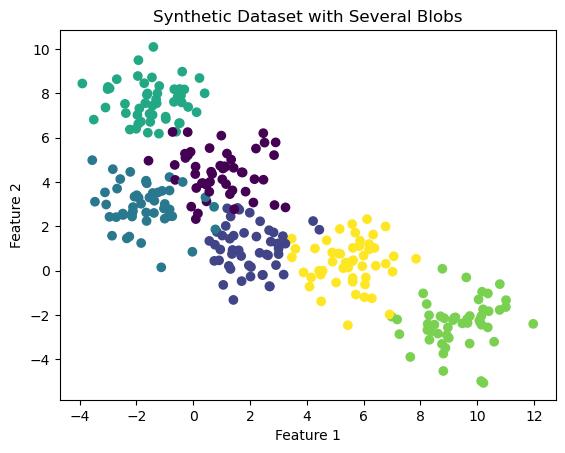

In [30]:
# Create a dataset with 3 blobs
X, y = make_blobs(n_samples=300, centers=6, n_features=2, cluster_std=1.0, random_state=0)

# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic Dataset with Several Blobs')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [31]:
X_extra, y_extra = make_blobs(n_samples = 150, centers=3, n_features=2, cluster_std=1.0, random_state=123)

no_samples = len(X_extra)
y_extra = np.random.randint(7, 10, no_samples)

X = np.vstack([X, X_extra.copy()])
y = np.hstack([y, y_extra.copy()])



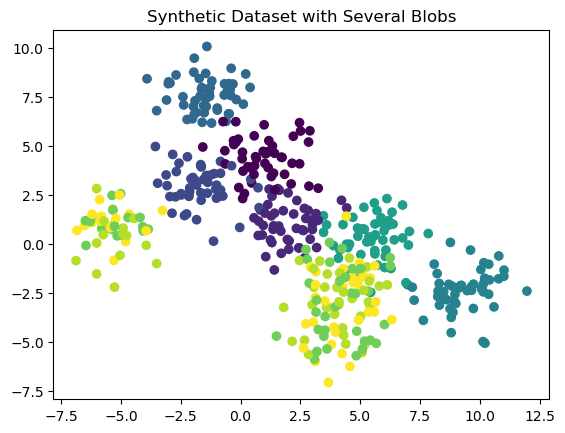

In [32]:
# Visualizing the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Synthetic Dataset with Several Blobs')
plt.show()

Numpy way

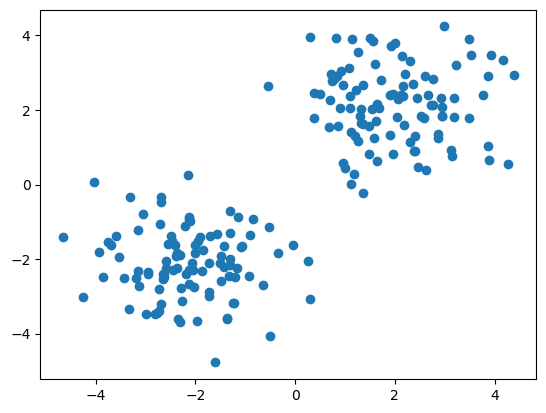

In [33]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

mean1 = [2, 2]
cov1 = [[1, 0], [0, 1]]

mean2 = [-2, -2]
cov2 = [[1, 0], [0, 1]]

labels = []

# Generate samples
data1 = np.random.multivariate_normal(mean1, cov1, 100)
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# Combine the data from the two clusters
data = np.vstack((data1, data2))

# Plot
plt.scatter(data[:, 0], data[:, 1])
plt.show()


From Image

In [1]:
from utils import SyntheticDataset

# Replace 'your_image_path.jpg' with the path to your image
image_path = "C:/Users/Zayan/Documents/code/personal_repos/adaptive vector quantization/assets/dataset1.png"

dataset = SyntheticDataset(image_path)
dataset.generate_data_from_img()
dataset.transform_to_numeric_classes('class')
df = dataset.get_dataset()


In [2]:
df

,coordinate,rgb,class
0,"(346, 229)","(63, 72, 204)",0
1,"(346, 230)","(63, 72, 204)",0
2,"(346, 231)","(63, 72, 204)",0
3,"(346, 232)","(63, 72, 204)",0
4,"(346, 233)","(63, 72, 204)",0
...,...,...,...
6143,"(794, 388)","(237, 28, 36)",2
6144,"(794, 389)","(237, 28, 36)",2
6145,"(794, 390)","(237, 28, 36)",2
6146,"(794, 391)","(237, 28, 36)",2


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df['class'].value_counts()

class
2    2560
0    1518
1    1417
3     653
Name: count, dtype: int64

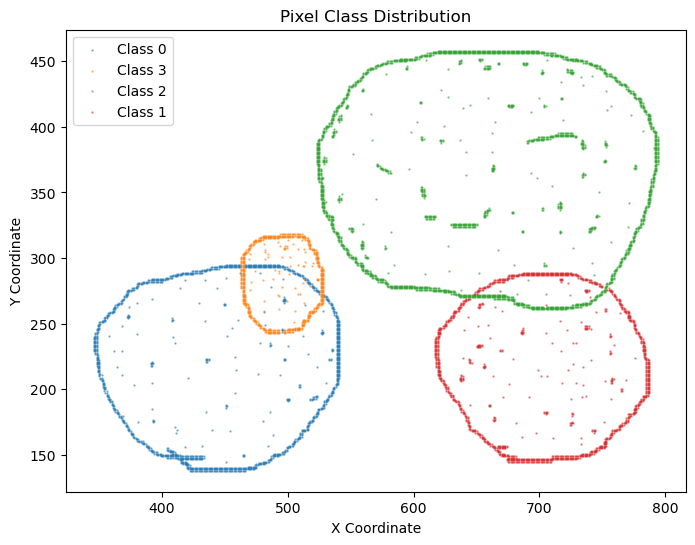

In [2]:
dataset.plot_data()

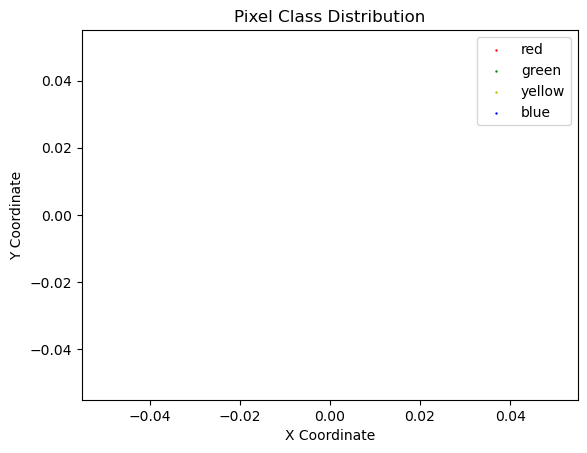

In [11]:
# # Create a figure and axis for the plot
# fig, ax = plt.subplots()

# # List of colors for plotting, should match the classes in your DataFrame
# colors = {'red': 'r', 'green': 'g', 'yellow': 'y', 'blue': 'b'}

# # Plot each class with its respective color
# for label, color in colors.items():
#     subset = df[df['class'] == label]
#     subset_x = [coord[0] for coord in subset['coordinate']]
#     subset_y = [coord[1] for coord in subset['coordinate']]

#     ax.scatter(subset_x, subset_y, c=color, s=0.5, label=label)

# # Optional: Invert y-axis to match the image's original coordinate system
# # ax.invert_yaxis()

# # Optional: Add legend and titles
# ax.legend()
# plt.title('Pixel Class Distribution')
# plt.xlabel('X Coordinate')
# plt.ylabel('Y Coordinate')
# plt.show()


## Neural Gas

In [ ]:
class NeuralGas:
    def __init__(self, dataset, n_neurons, decay=0.5, learning_rate=0.0001, lambda_=1.0, max_iter = 100, lifetime=10):
        self.n_neurons = n_neurons
        self.connections = np.zeros((n_neurons, n_neurons)) # initialize connections
        
        if isinstance(dataset, pd.DataFrame):
            self.data = dataset.to_numpy()
        else:
            self.data = dataset
        
        